# Compute the wavelet cross spectra of hammer signals

In [1]:
# Import
from matplotlib.pyplot import subplots
from pandas import Timestamp, Timedelta
from numpy import geomspace, meshgrid, flip, pi
from os.path import join

from utils_basic import ROOTDIR_GEO, GEO_COMPONENTS, get_unique_stations, power2db
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import extract_freq_phase_pairs, get_stream_cross_spectra, get_cwt_freqs
from utils_plot import get_geo_component_color, plot_cwt_powers,  plot_cwt_cross_spectra, component_to_title
from utils_snuffler import read_phase_markers


In [2]:
# Inputs
## Input data
indir = ROOTDIR_GEO
hammer = "hammer07-20-22"
begin = -0.5
dur = 2.0
station1 = "A03"
station2 = "A04"
components = GEO_COMPONENTS

## Wavelet transform
wavelet = "cmor"
bandwidth = 5.0
center_freq = 1.0
scales = geomspace(5, 100, 200)

## Frequency limits for unwrapping
freqmin_window = 60.0
freqmax_window = 80.0

## Plotting
cohe_threshold = 0.8
power_threshold = -20.0
freqlim_plot = (20.0, 200.0)

In [3]:
# Read the hammer phase markers
inpath = join(indir, f"ppicks_{hammer}.dat")
pick_df = read_phase_markers(inpath)

In [4]:
# Read the waveforms
starttime = pick_df["time"].min() + Timedelta(seconds=begin)
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=[station1, station2])

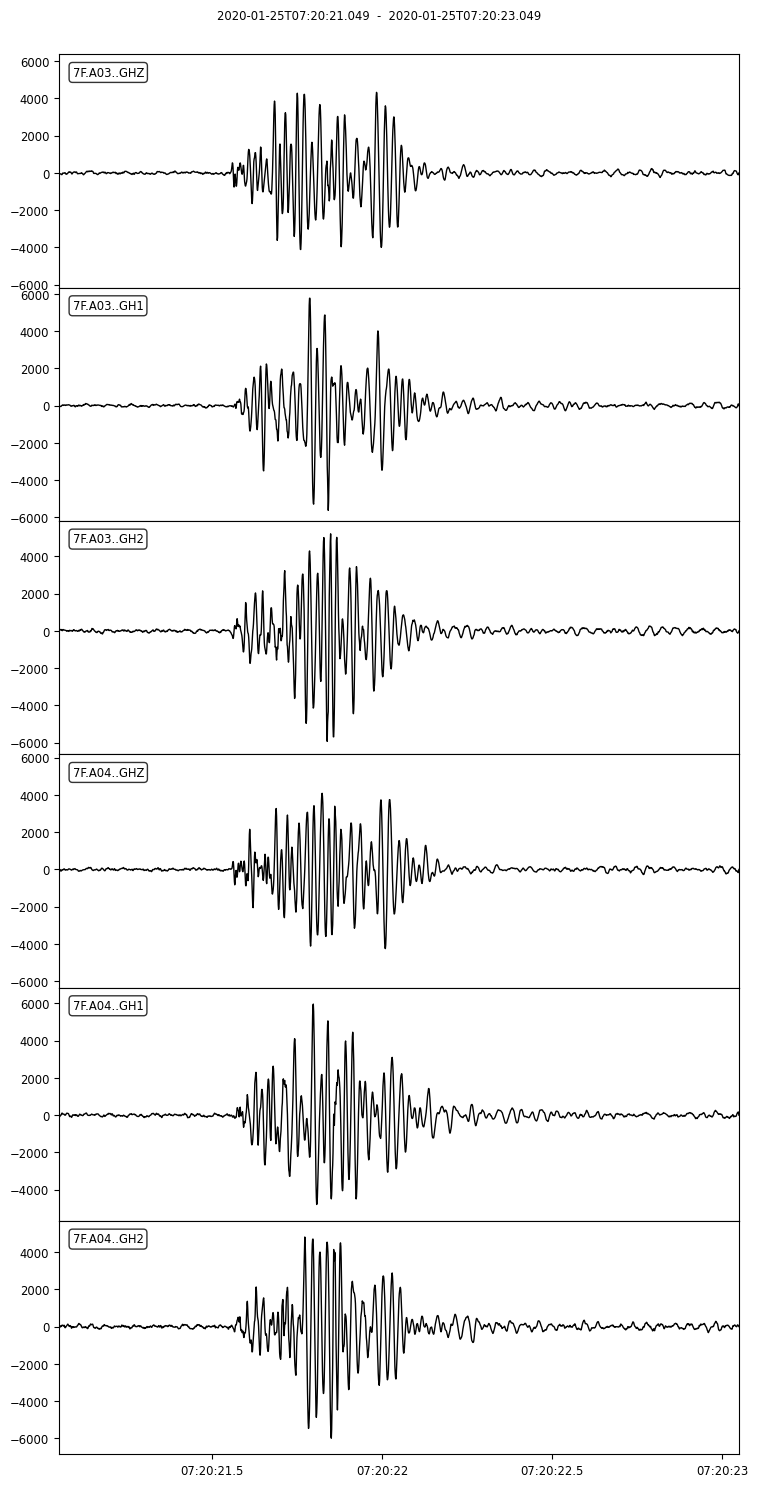

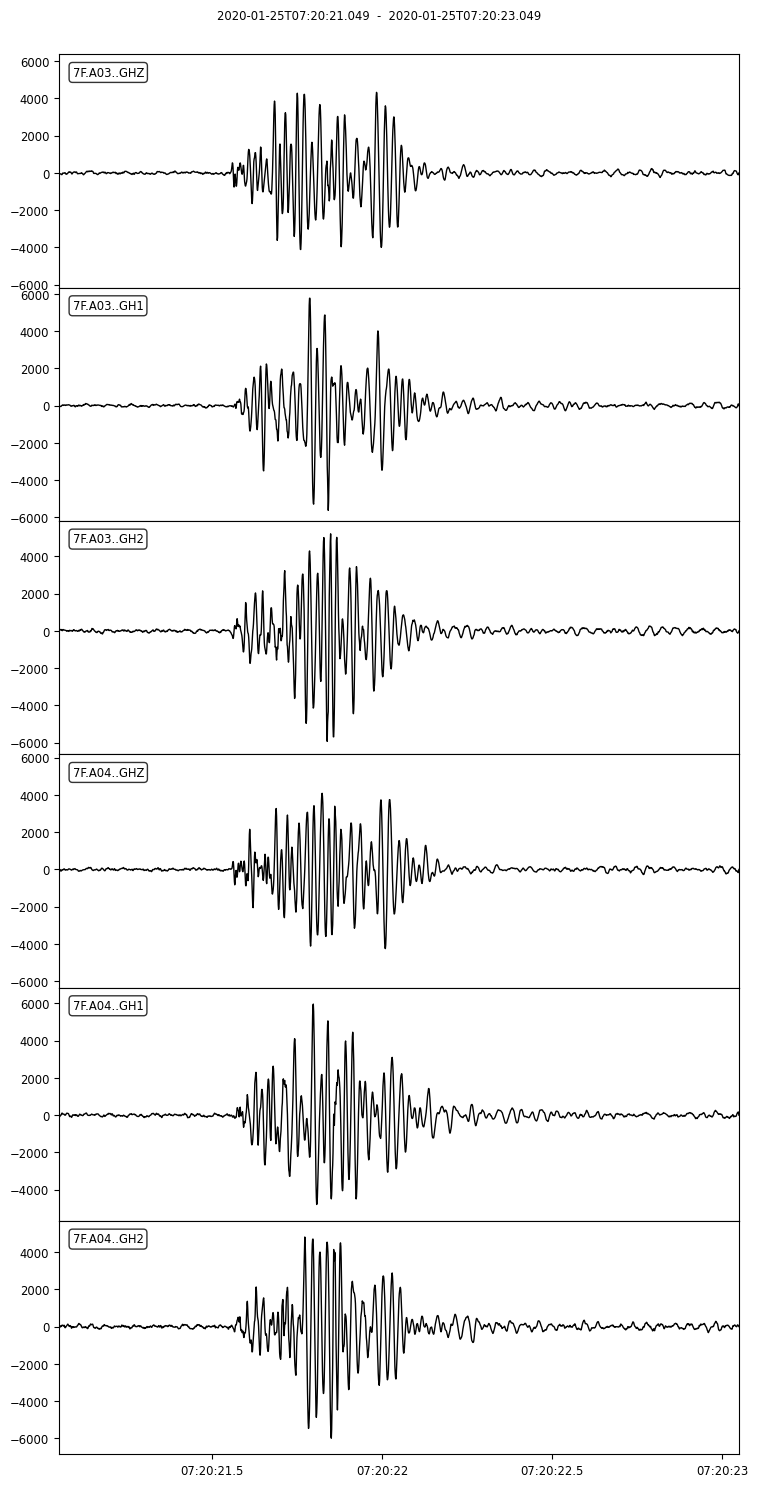

In [5]:
stream.plot()

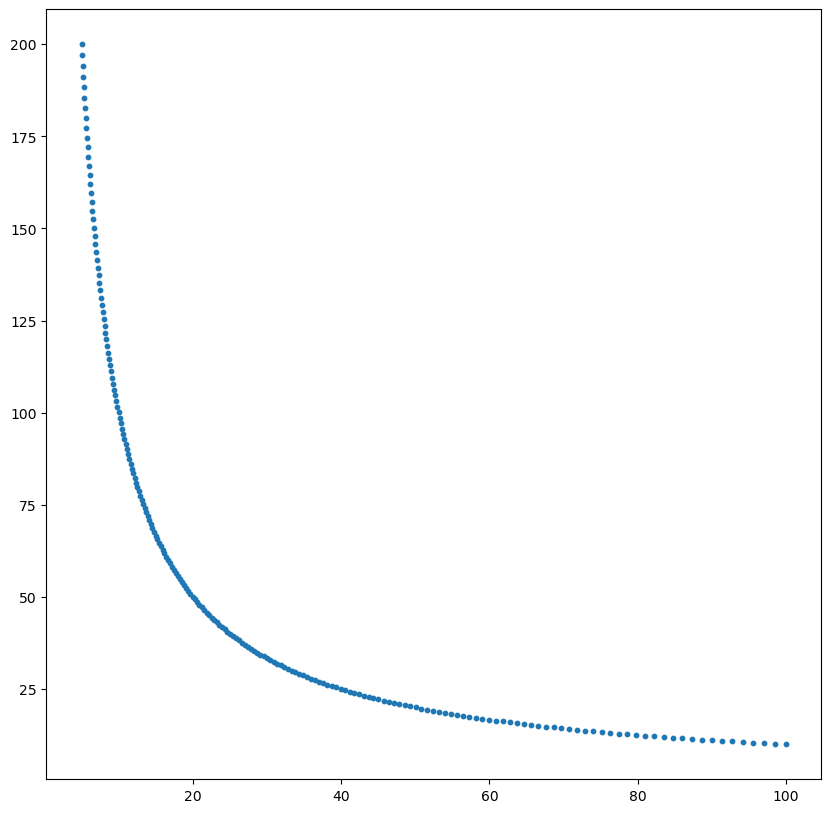

In [7]:
# Compute the frequencies corresponding to the scales and plot
freqs = get_cwt_freqs(scales, wavelet, bandwidth, center_freq)

fig, ax = subplots(1, 1, figsize=(10, 10))
ax.scatter(scales, freqs, s=10)

In [8]:
# Compute the spectra and cross-spectra
specs, cross_specs = get_stream_cross_spectra(stream, wavelet=wavelet, bandwidth=bandwidth, center_freq=center_freq, scales=scales, coherence=True)

0.2 1


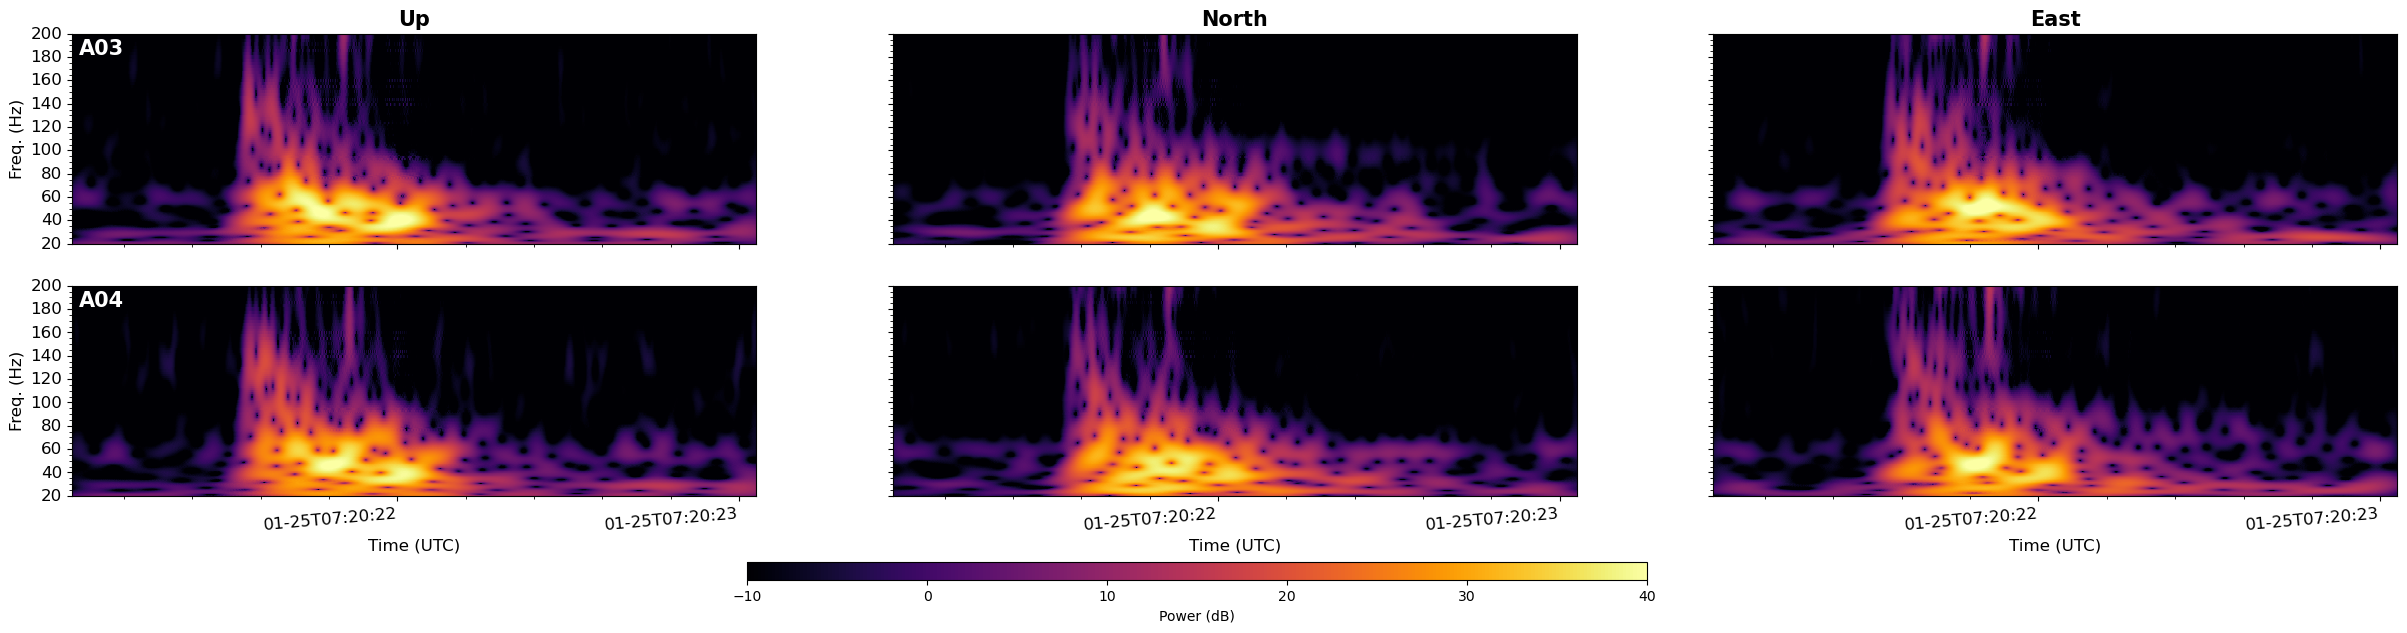

In [9]:
# Plot the CWT powers
fig, axes, cbar = plot_cwt_powers(specs, freqlim=freqlim_plot, major_time_spacing=1, minor_time_spacing=0.2, major_freq_spacing=20.0, minor_freq_spacing=5.0, dbmin=-10, dbmax=40.0)

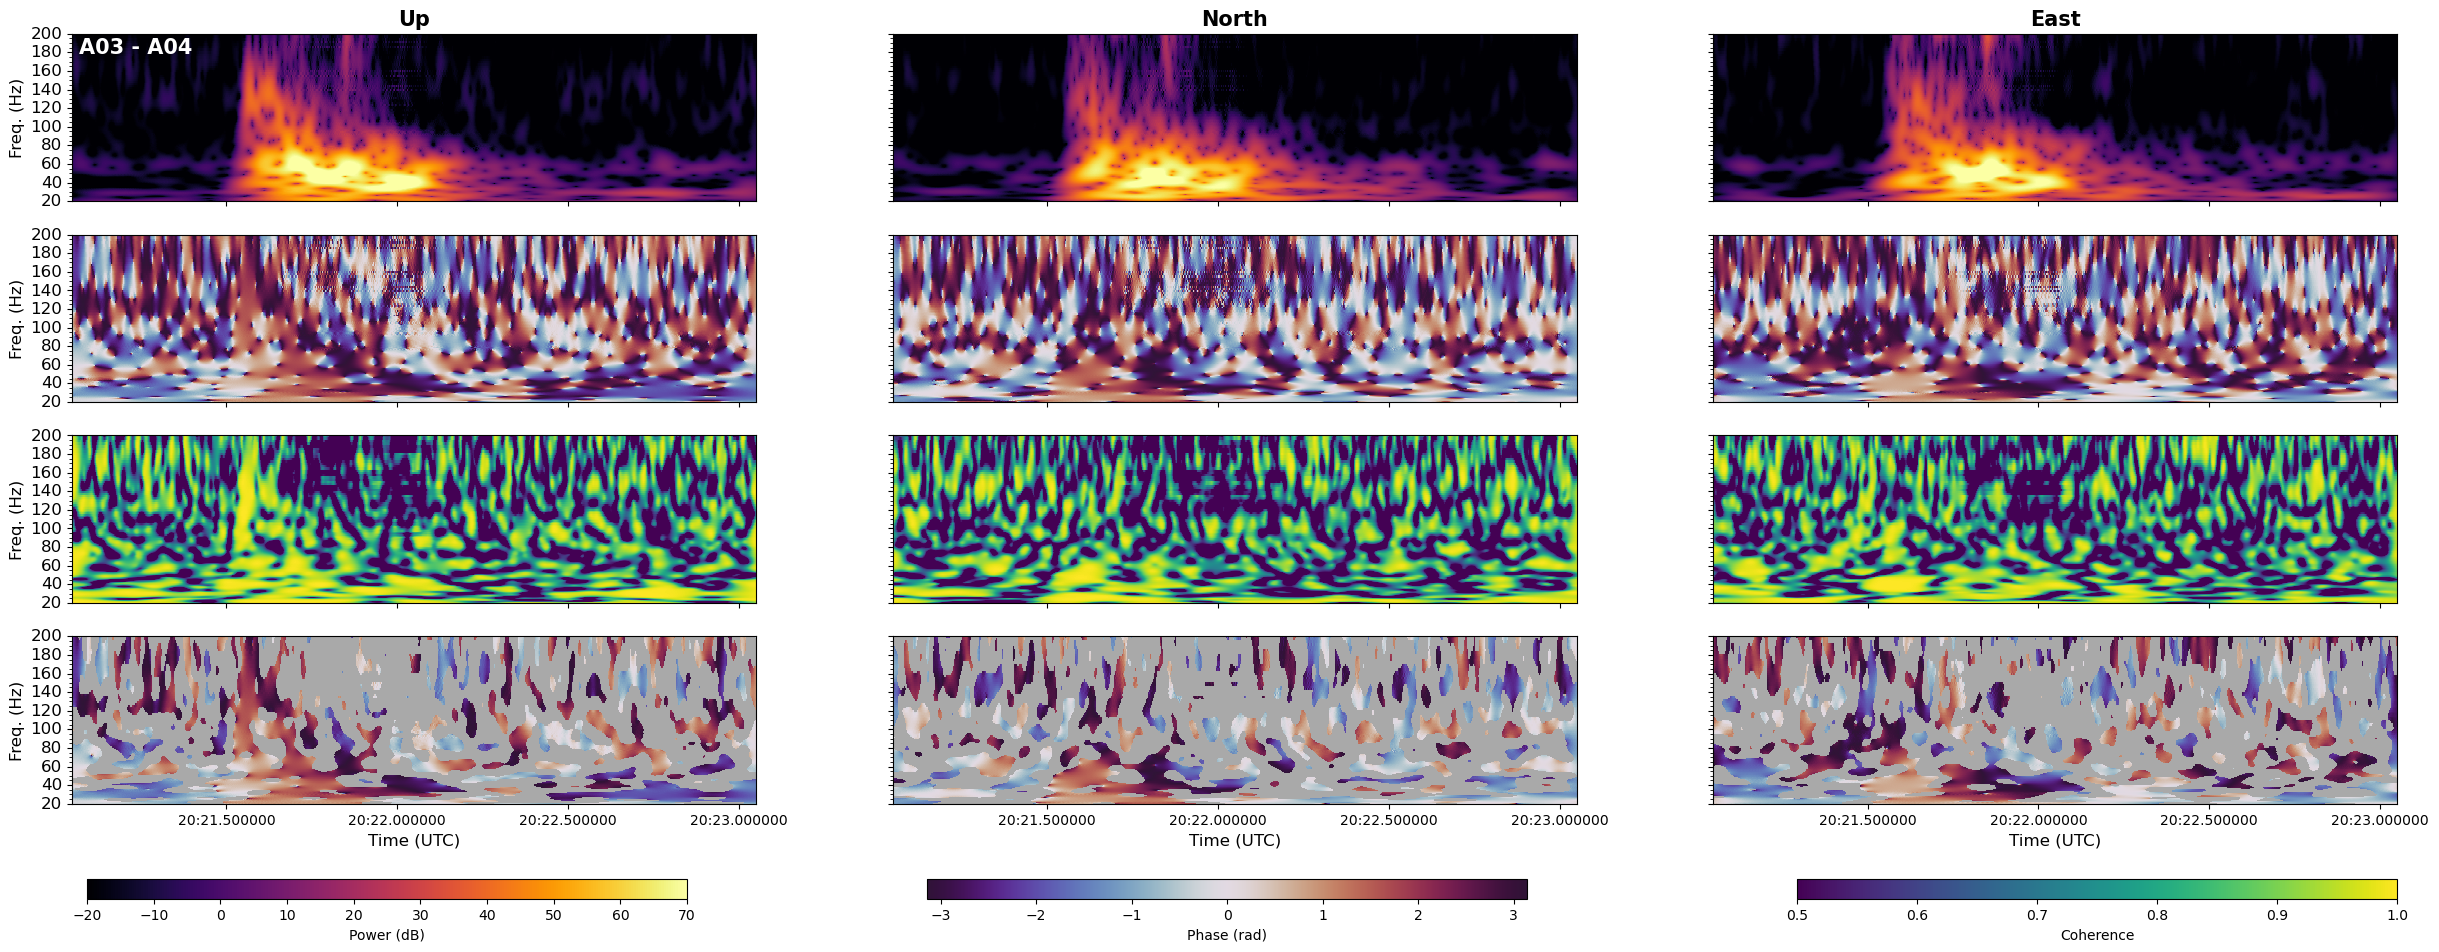

In [12]:
# Plot the cross-spectral powers, phase, and coherence
sta_pairs = [(station1, station2)]
fig, axes, power_cbar, phase_cbar, cohe_cbar = plot_cwt_cross_spectra(cross_specs, sta_pairs, freqlim=freqlim_plot, threshold=cohe_threshold, major_time_spacing=1, minor_time_spacing=0.2, major_freq_spacing=20.0, minor_freq_spacing=5.0, dbmin=-20.0, dbmax=70.0)

In [11]:
indir

'/Volumes/OmanData/data/geophones'